# Ames Housing Sale Price Analysis

### Virginia Zapanta

## Executive Summary
The purpose of this project is to examine the dataset that contains home sales in Ames, Iowa between 2006 and 2010.
The data will be loaded from csv into pandas dataframe, cleaned, explored, analyzed and to be presented in a graphical format so we can see the analytics presented visually. The final outcome of this project is to help us grasp the home sales price based on variables of every feature of residential homes in Ames, Iowa. 

## The Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

#### Dataframe Info
I wanted to get more familiar with the data and I will start by using .info() method.
This function will tell me if the data.csv file was converted to dataframe correctly. It will also print
more information about the table:

1. Here, I find that there are 1460 entries or rows in the dataframe.
2. Next, I see the range of values of the row indexes, first index as 0, and last index is 79.
3. A total of 80 columns and count of non-missing values (Non-Null) are also provided.
4. All the column names are displayed and their corresponding data types:
    - 3 columns, float dtype
    - 34 columns, int dtype
    - 43 columns, object dtype


In [2]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Missing Data Values
Using .isna() function will help me locate all columns with missing values or NaN in the entire dataframe. 

We have 19 columns in the dataframe with missing values. 


In [3]:
print (df.isna().any().sum(), "columns have missing values\n")

nan_columns= df[df.columns[df.isna().any()]]
print(nan_columns)

19 columns have missing values

      LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
Id                                                                              
1            65.0   NaN    BrkFace       196.0       Gd       TA           No   
2            80.0   NaN       None         0.0       Gd       TA           Gd   
3            68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
4            60.0   NaN       None         0.0       TA       Gd           No   
5            84.0   NaN    BrkFace       350.0       Gd       TA           Av   
...           ...   ...        ...         ...      ...      ...          ...   
1456         62.0   NaN       None         0.0       Gd       TA           No   
1457         85.0   NaN      Stone       119.0       Gd       TA           No   
1458         66.0   NaN       None         0.0       TA       Gd           No   
1459         68.0   NaN       None         0.0       TA       TA           Mn

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('Index Name:', df.index.name)
print('# of rows and columns: ',df.shape)

Index Name: Id
# of rows and columns:  (1460, 80)


In [6]:
df.shape[1]

80

## Distribution of `SalePrice`

In this early stage, let's take a quick look to plot univariate histogram using Seaborn.

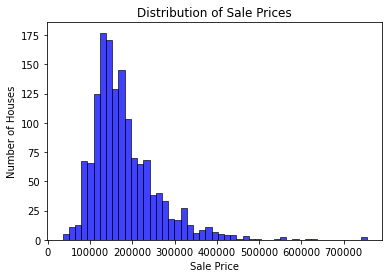

In [7]:
import seaborn as sns

#draw a histogram 
sns.histplot(df['SalePrice'], color = 'b')
plt.xlabel("Sale Price")
plt.ylabel('Number of Houses')
plt.title('Distribution of Sale Prices');

#### Some Statistics of the Housing Price
    To better explore the mean, maximum and mininum prices, I am going to check some statistics of the home sales price. I am going to use .describe() on the SalePrice column of the dataset.

In [8]:
print("\nSome Statistics of the Housing Price:\n")
print(df['SalePrice'].describe())    


Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


##### By calculating the statistics of the sale price, I can see also observe in the graph the median price of the housing price. In the next step, I will execute the code to print out the median.

In [9]:
print("\nThe median of the Housing Price is: ", df['SalePrice'].median(axis = 0))


The median of the Housing Price is:  163000.0


In [10]:
print("\nThe largest sale of the Housing Price is: ", df['SalePrice'].max(axis = 0))


The largest sale of the Housing Price is:  755000


In [ ]:
print("\nThe lowest of the Housing Price is: ", df['SalePrice'].min(axis = 0))

##### I'd like to simply calculate the sum of the total price using the .sum() function and format the output so it is easily readable.

In [11]:
TotalHomes=df.SalePrice.sum() 
TotalSalePrice=df.SalePrice.sum()   #264144946
Formatted_TotalSalePrice = "${:,.2f}".format(TotalSalePrice)
print(f"\nThe total sales price of all the homes sold in Ames, Iowa between the year 2006 and year 2010 was:", Formatted_TotalSalePrice)   


The total sales price of all the homes sold in Ames, Iowa between the year 2006 and year 2010 was: $264,144,946.00


## Differences between Subsets

I am going to see how does condition of house affect price. 

First, I am going to extract the list of conditions and counts on the column named 'OverallCond'.
this can be done by using value_counts()function and use the normalize parameter which I will execute in the next step.

In [12]:
#Value_Counts() as percentage
OverAllCondition= df['OverallCond'].value_counts(ascending=True, dropna=False)
OverAllCondition

1      1
2      5
9     22
3     25
4     57
8     72
7    205
6    252
5    821
Name: OverallCond, dtype: int64

Sometimes, getting a percentage is a better criterion than the count. In the next step, I will calculate the relative frequencies of over all condition as well.

In [13]:
OverAllCondition_Percent= df['OverallCond'].value_counts(normalize=True, ascending=True)
OverAllCondition_Percent

1    0.000685
2    0.003425
9    0.015068
3    0.017123
4    0.039041
8    0.049315
7    0.140411
6    0.172603
5    0.562329
Name: OverallCond, dtype: float64

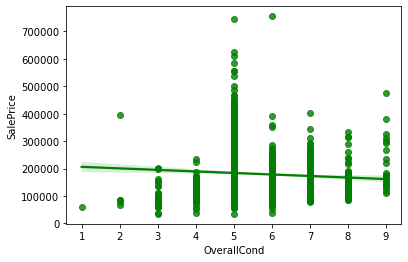

In [14]:
#Plot data 
ax = sns.regplot(x = 'OverallCond', y = 'SalePrice', data = df, color = 'Green')

##### What does this tell me?

That majority of the residential homes that were sold in Ames, Iowa between 2006 and 2010 had an over-all condition of 5, which is the indicator of Average condition.

The data further tells me that there are 821 homes total that were sold in this Average condition. 


##### I am going to split the different types of condition of all houses sold in three groups.
1.  "Average" OverallCond=5
2. "Below Average" OverallCond < 5
3. "Above Average" OverallCond > 5

In the next step, I am going to calculate and group them by comparing and assigning these conditional values to find out the number of houses sold based on aforementioned conditions of the houses that were sold at that time.


In [15]:
BelowCondition=OverAllCondition[1]+OverAllCondition[2]+OverAllCondition[3]+OverAllCondition[4]
print(f"\nThe number of houses sold in Below Average condition was: ", BelowCondition)


The number of houses sold in Below Average condition was:  88


In [16]:
AboveCondition=OverAllCondition[6]+ OverAllCondition[7]+OverAllCondition[8]+OverAllCondition[9]
print(f"\nThe number of houses sold in Above Average condition was: ", AboveCondition)


The number of houses sold in Above Average condition was:  551


In [17]:
AverageCondition=OverAllCondition[5]
print(f"\nThe number of houses sold in Average condition was: ",AverageCondition)


The number of houses sold in Average condition was:  821


##### Bivariate Analog of a Histogram
This hexbin plot shows the counts of observations that fall within bins.

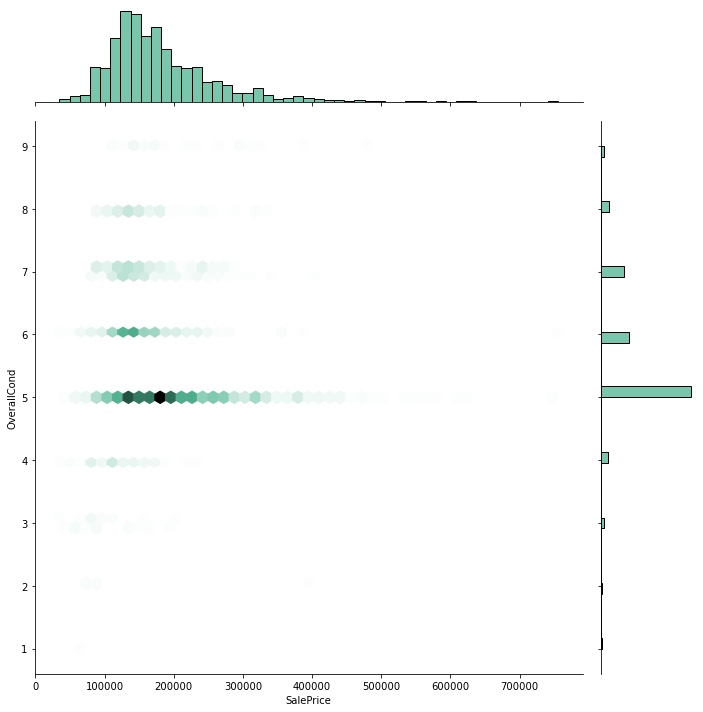

In [18]:
sns.jointplot(x="SalePrice", y="OverallCond", data=df, height=10, kind="hex", color="#4CB391");

## Correlation between [Column] and `SalePrice`

I am going to generate heatmap and use .corr() to find correlation between different variables. I will set up the
Matplotlib plot configuration, customize the map and draw the heatmap using Seaborn.

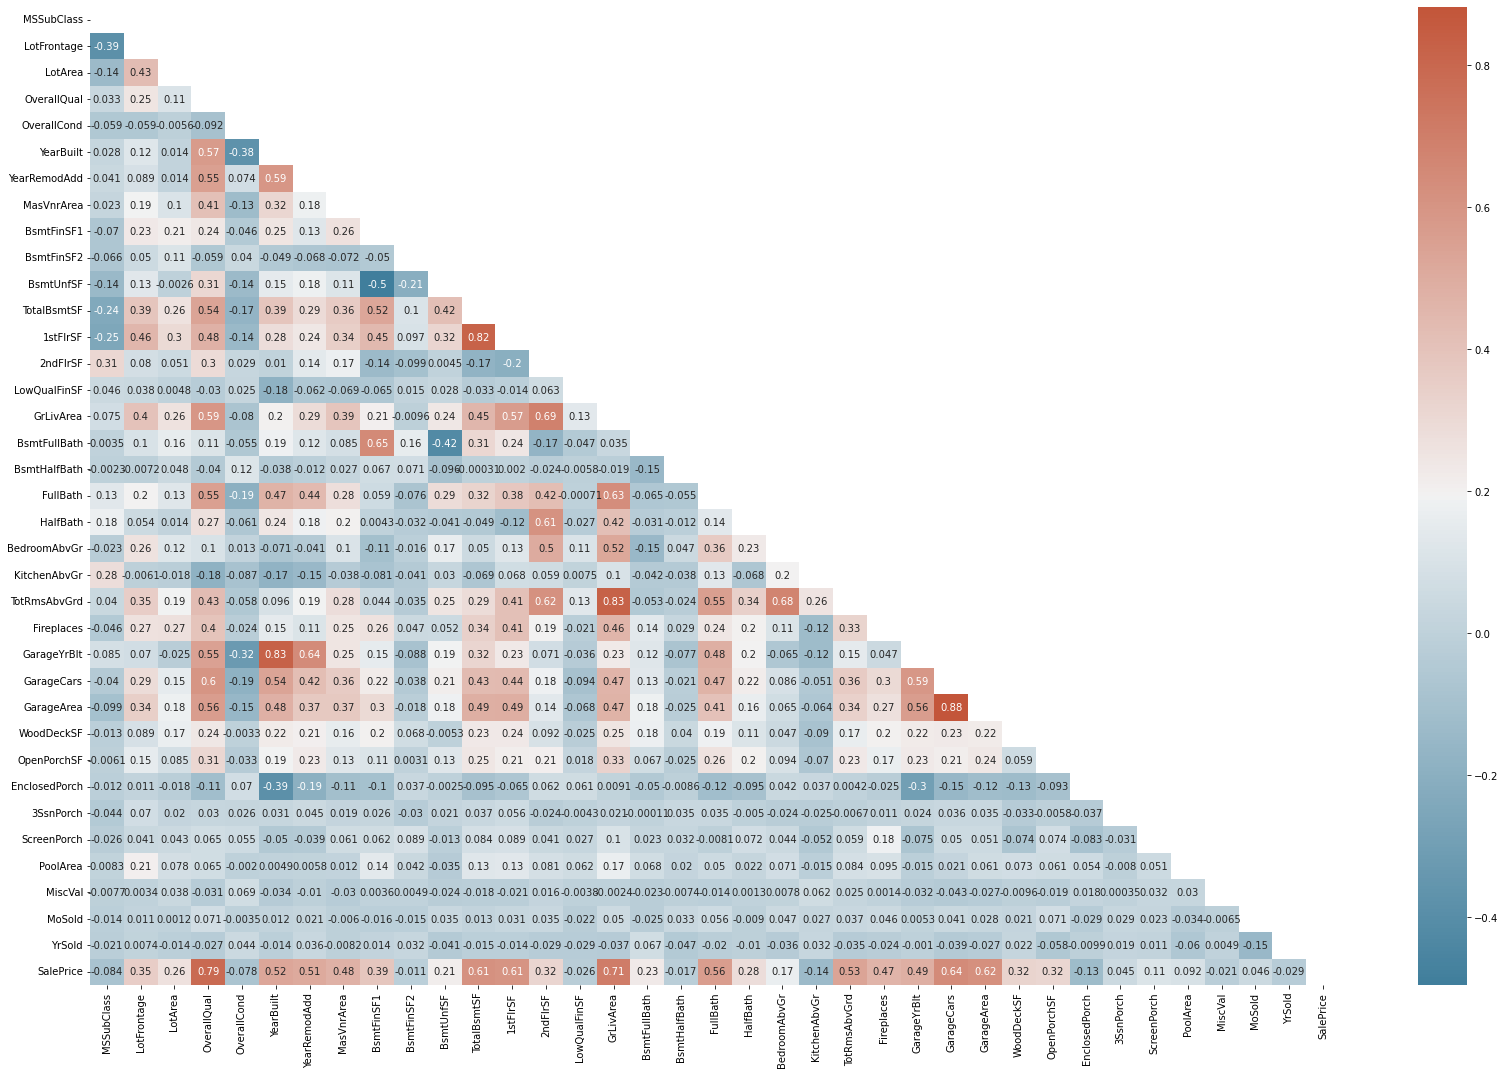

In [30]:
#heatmap:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr()
f, ax = plt.subplots(figsize=(28, 18))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

#### This heatmap gives me values that show which variables have very strong correlation, strong correlation, moderation correlation and weak correlation.

##### I observed that the housing price correlates strongly with GrLivArea column (GarageCars). It shows a strong correlation of 0.71.I am going to plot GrLivArea feature with Sale Price.

#### Scatter Plot Visualization showing a feature with a strong correlation with the housing price.

The GarageCars is a feature with large correlation coefficient strongly correlated with the target variable (SalePrice)


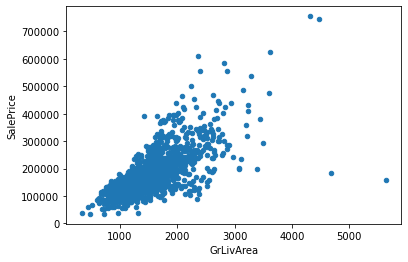

In [32]:
df.plot(kind="scatter", x="GrLivArea", y="SalePrice");

## Engineered Feature: [Column]

#### Histogram of Sales Price Vs Year Built
I am going to draw a histogram with a new feature showing when the home was built and how it was related to # of homes sold and sales price.

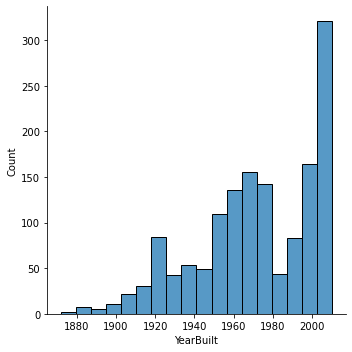

In [33]:
sns.displot(df['YearBuilt']);

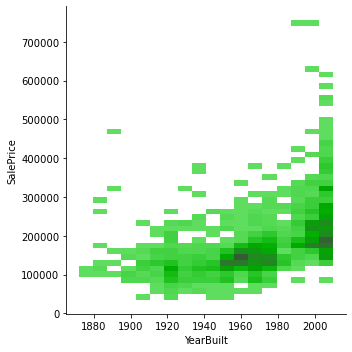

In [34]:
ax = sns.displot(x = 'YearBuilt', y = 'SalePrice', data = df, color = 'Green')

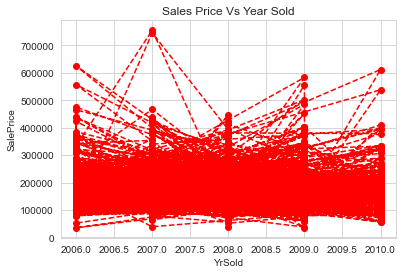

In [35]:
sns.set_style("whitegrid")
plt.plot(df['YrSold'], df['SalePrice'],marker='o', linestyle='--', color='r',label='Year Sold')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title('Sales Price Vs Year Sold')
plt.show()

#### Plotting of Year Sold vs Sale Price

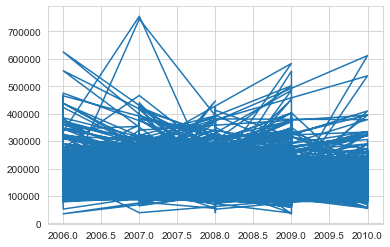

In [36]:
#Data Plotting with Matplotlib
plt.plot(df['YrSold'], df['SalePrice'],  label='Year Sold')

The data tells me the housing price correlates strongly with Year Built.